In [1]:
import warnings
import numpy as np
import seaborn as sns
from helper import display_data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
sns.set_context('notebook')
sns.set_style('dark')
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
display_data(data)

array([[  6.1101,  17.592 ],
       [  5.5277,   9.1302],
       [  8.5186,  13.662 ],
       [  7.0032,  11.854 ],
       [  5.8598,   6.8233]])

In [3]:
X, y = data[:,0], data[:,1]
display_data(X), display_data(y)

(array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598]),
 array([ 17.592 ,   9.1302,  13.662 ,  11.854 ,   6.8233]))

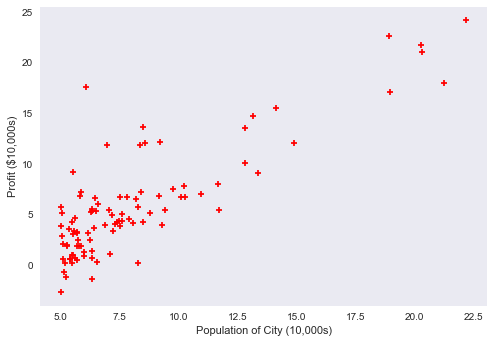

In [4]:
plt.scatter(X, y, s=30, c='r', marker='+', linewidths=1)
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000s)')

In [5]:
def compute_cost(X, y, theta):
    m = y.size
    h = X.dot(theta)
    # J = (1 / (2 * m)) * np.sum(np.square(h - y))
    J = np.sum(np.square(h - y)) / (2 * m)
    return J

In [6]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = np.c_[y]
display_data(X), display_data(y)

(array([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598]]), array([[ 17.592 ],
        [  9.1302],
        [ 13.662 ],
        [ 11.854 ],
        [  6.8233]]))

In [7]:
theta = [[0], [0]]
compute_cost(X, y, theta)

32.072733877455676

In [8]:
def gradient_descent(X, y, theta, alpha=0.01, num_iters=2400):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        h = X.dot(theta)
        theta = theta - alpha * (1 / m) * (X.T.dot(h - y))
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history

In [9]:
# theta for minimized cost J
theta, J_history = gradient_descent(X, y, theta)
print('theta:', theta.ravel())

theta: [-3.84344015  1.18777545]


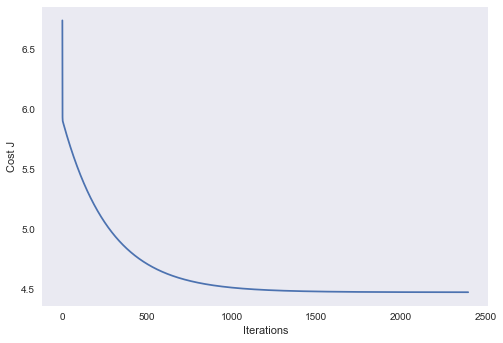

In [10]:
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

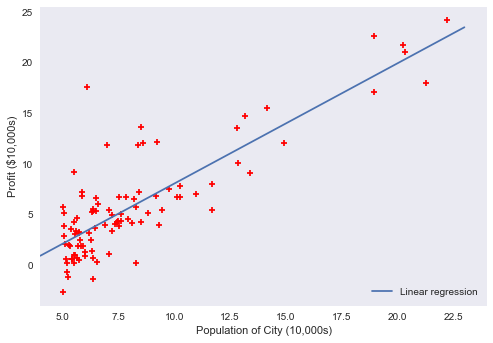

In [11]:
lr_X = np.arange(4, 24)
lr_y = theta[0] + theta[1] * lr_X

plt.scatter(X[:,1], y, s=30, c='r', marker='+', linewidths=2)
plt.plot(lr_X, lr_y, label='Linear regression')

plt.xlim(4,24)
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000s)')
plt.legend(loc=4);

In [12]:
theta.T.dot([1, 3.5]) * 10000

array([ 3137.73927502])

In [13]:
theta.T.dot([1, 7]) * 10000

array([ 44709.88002766])

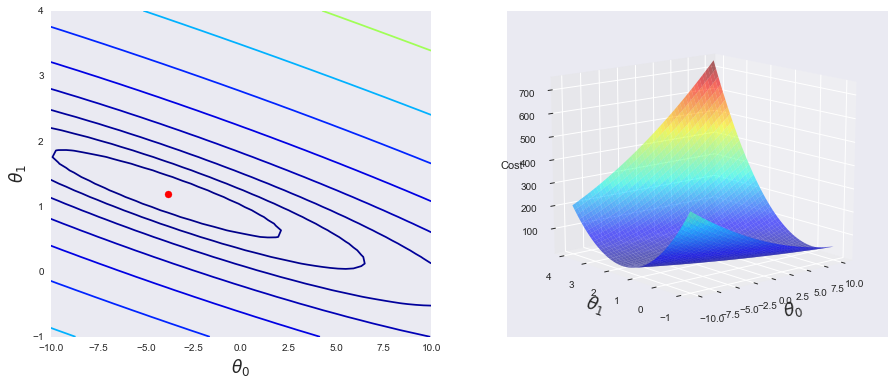

In [14]:
# Taken from JWarmenhoven's work on GitHub with minor modifications

# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = compute_cost(X, y, theta=[[xx[i, j]], [yy[i, j]]])

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0], theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(), Z.max())
ax2.view_init(elev=15, azim=230)

for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)